# Post-hoc analysis: Kernel SHAP
## Models: White-box, Black-box (trained on TF-IDF)
Reference: https://interpret.ml/docs/shap.html
## Work done:
- Load pre-train models
- Create SHAP- Explainer
- Fit lime explainer using the pre-trained models and X_train
- Show local explanation upto 20 first items in the test data => Extract shapley value results

In [1]:
# import caffeine
# caffeine.on(display=False)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Run this for reproduce
# Gets the current working directory
import os
cwd = os.getcwd()
print("Working directory:", cwd)
# Go up one directory from working directory
os.chdir("..")

Working directory: /home/jovyan/1_UT THESIS/CB12_MAIN/xai_posthoc


In [4]:
import pandas as pd
import numpy as np

In [5]:
# Import library for baseline classification models
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [6]:
import matplotlib.pyplot as plt
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

In [7]:
from interpret import show
# from interpret.blackbox import Limeflat
# from interpret.blackbox import ShapKernel

In [ ]:
import shap
shap.initjs()

# Load data

In [9]:
# Load input: train_data_flat, test_data_flat
train_data_flat = pd.read_csv('./xai_posthoc/train_data_flat.csv')
test_data_flat = pd.read_csv('./xai_posthoc/test_data_flat.csv')

In [10]:
drop_cols_flat = ['UserID','JobID', 'label','u_idx','j_idx',
                  'work_history_matrix', 'job_matrix', 
                  'mean_work_history_matrix', 'mean_job_matrix', 
                  'flat_work_history', 'flat_job']
X_train = train_data_flat.drop(columns = drop_cols_flat, axis = 1)
X_test = test_data_flat.drop(columns = drop_cols_flat, axis = 1)

In [11]:
y_train = np.load("./xai_posthoc/y_train_tabular.npy")
y_test = np.load("./xai_posthoc/y_test_tabular.npy")

# Get explanation: Local explanation on sample of 20 applications
- White-box models: logreg, dt, nb
- Black-box models: xgbt, ada, lda, qda

## 1. Model: logreg

In [15]:
# Load a baseline model
import pickle
model = 'logreg'
model_name = './output_baseline_tabular/cb12_logreg_flat.pikle'
logreg = pickle.load(open(model_name, "rb"))

In [16]:
%%time

# Create explainer
f = lambda x: logreg.predict_proba(x)[:,1]
explainer = shap.KernelExplainer(f, X_test)

Using 15736 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


CPU times: user 15.2 ms, sys: 10.8 ms, total: 26 ms
Wall time: 18.5 ms


### Explain many predictions (20 first applications)
- Using interpret libary took > 2 hours for 5 first X_test
- Using shap library can shorten computing time (depends on n_samples)
Here we use a selection of 20 samples from the dataset to represent “typical” feature values, and then use 500 perterbation samples to estimate the SHAP values for a given prediction. Note that this requires 500 * 20 evaluations of the model.

- Tutorial 1: https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/kernel_explainer/Census%20income%20classification%20with%20scikit-learn.html
- Tutorial 2:https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/kernel_explainer/Census%20income%20classification%20with%20scikit-learn.html

In [17]:
%%time
shap_values_logreg = explainer.shap_values(X_test.iloc[0:20,:], nsamples=500)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 35min 6s, sys: 4min 26s, total: 39min 33s
Wall time: 39min 7s


In [18]:
shap.force_plot(explainer.expected_value, shap_values_logreg, X_test.iloc[0:20,:])

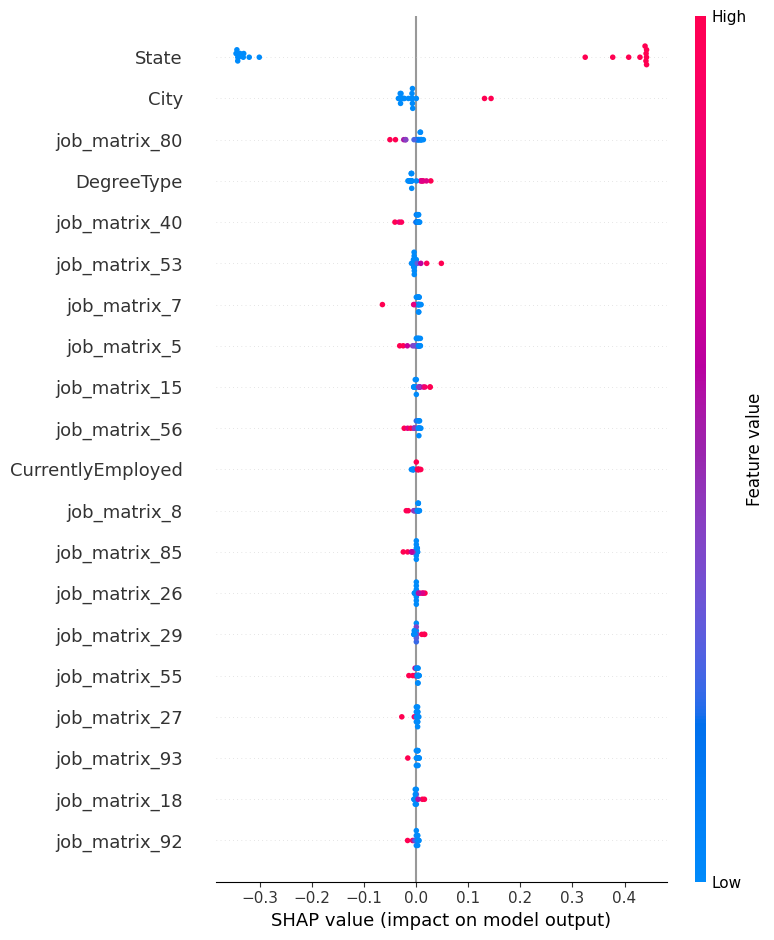

In [19]:
shap.summary_plot(shap_values_logreg, X_test.iloc[0:20,:])

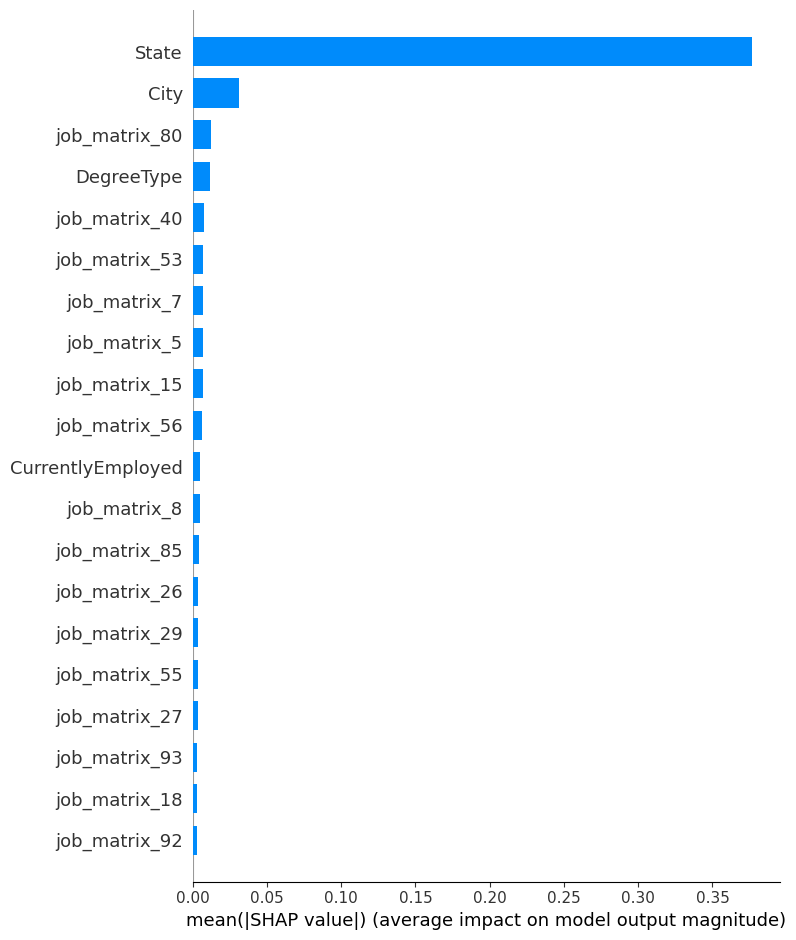

In [20]:
shap.summary_plot(shap_values_logreg, X_test.iloc[0:20,:], plot_type = 'bar')

In [21]:
len(shap_values_logreg)

20

In [22]:
shap_values_logreg[0]

array([ 0.00000000e+00,  4.08028185e-01,  0.00000000e+00,  8.05638506e-03,
        2.08254990e-03,  0.00000000e+00,  1.99234369e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.65081963e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.31050935e-04,
        3.13998707e-03,  1.17814752e-04,  1.46213252e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.56017814e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.92175967e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.03586633e-03,  0.00000000e+00, -2.62667356e-03,  0.00000000e+00,
        0.00000000e+00,  

### Explain single case (one application)

In [24]:
%%time
# Generate explanation for one single case (X_test.iloc[0,:])
shap_values_single = explainer.shap_values(X_test.iloc[0,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, X_test.iloc[0,:])

CPU times: user 1min 13s, sys: 1.96 s, total: 1min 15s
Wall time: 1min 15s


### Save shap_value for sample

In [25]:
shap_values_df = pd.DataFrame(shap_values_logreg)
shap_values_df.columns = X_train.columns

In [26]:
shap_values_df

,City,State,Country,DegreeType,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,work_matrix_0,...,job_matrix_90,job_matrix_91,job_matrix_92,job_matrix_93,job_matrix_94,job_matrix_95,job_matrix_96,job_matrix_97,job_matrix_98,job_matrix_99
0,0.000000,0.408028,0.000000,0.008056,0.002083,0.000000,0.001992,0.000000,0.000000,0.000000,...,0.000000,0.000678,0.000000,0.003255,0.000000,0.000000,0.000000,-0.003527,0.000000,0.002408
1,-0.032556,-0.301694,0.000000,0.019481,0.003960,-0.000867,0.008583,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005100,0.004494,0.001506,0.002809,0.000000,-0.001892,0.000000,0.004843
2,-0.034414,-0.321037,0.000000,0.027827,0.000000,0.000000,-0.009474,0.000000,0.000000,0.000000,...,0.000000,0.001765,0.002797,0.002377,0.000000,0.000000,0.001976,0.000000,0.000000,-0.007598
3,-0.024840,-0.346374,-0.001000,0.013440,-0.002773,0.000000,-0.005175,-0.000862,-0.001893,0.000000,...,0.000000,0.000000,0.001463,-0.016389,0.000000,0.000816,0.000000,0.000000,-0.001425,0.000000
4,-0.008346,0.442345,-0.001177,-0.009480,-0.003780,-0.001784,-0.005778,-0.001017,0.000000,0.000000,...,0.001193,-0.006387,0.001391,0.002883,-0.003161,-0.002180,0.002104,-0.000766,0.000000,0.002604
5,-0.007439,0.441155,-0.000669,-0.008999,-0.003309,-0.001382,-0.005482,-0.000696,0.000000,0.000133,...,0.000877,0.000000,-0.007141,0.002306,-0.000988,0.001362,-0.001134,0.000000,0.000000,0.003213
6,-0.006951,0.439451,-0.000559,-0.008822,-0.002969,-0.001285,-0.005390,-0.001082,-0.000380,0.000000,...,0.001234,-0.012667,0.002095,0.002162,0.001291,0.001599,-0.001218,-0.000775,0.000370,0.003008
7,-0.030915,-0.332544,-0.004235,-0.014542,-0.005662,0.000000,-0.008142,-0.000936,0.000000,0.000000,...,0.000000,0.002232,0.004434,0.003171,0.002598,0.000000,0.000000,0.000000,0.000099,-0.001312
8,-0.029459,-0.338588,0.000000,-0.013137,-0.004767,0.000000,-0.007885,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003033,0.002349,0.000000,0.000000,0.000000,0.002385,-0.008760
9,-0.022859,-0.344720,0.000000,-0.009836,-0.004636,-0.002506,-0.004969,0.000000,0.000000,0.000000,...,0.000000,0.002063,0.001544,0.000000,0.000000,0.000000,0.000000,-0.001000,0.000000,0.004320


In [28]:
shap_values_df['UserID'] = test_data_flat.iloc[0:20,:]['UserID']

In [29]:
shap_values_df['JobID'] = test_data_flat.iloc[0:20,:]['JobID']

In [30]:
shap_values_df

,City,State,Country,DegreeType,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,work_matrix_0,...,job_matrix_92,job_matrix_93,job_matrix_94,job_matrix_95,job_matrix_96,job_matrix_97,job_matrix_98,job_matrix_99,UserID,JobID
0,0.000000,0.408028,0.000000,0.008056,0.002083,0.000000,0.001992,0.000000,0.000000,0.000000,...,0.000000,0.003255,0.000000,0.000000,0.000000,-0.003527,0.000000,0.002408,13,821691
1,-0.032556,-0.301694,0.000000,0.019481,0.003960,-0.000867,0.008583,0.000000,0.000000,0.000000,...,0.005100,0.004494,0.001506,0.002809,0.000000,-0.001892,0.000000,0.004843,13,329572
2,-0.034414,-0.321037,0.000000,0.027827,0.000000,0.000000,-0.009474,0.000000,0.000000,0.000000,...,0.002797,0.002377,0.000000,0.000000,0.001976,0.000000,0.000000,-0.007598,514,131166
3,-0.024840,-0.346374,-0.001000,0.013440,-0.002773,0.000000,-0.005175,-0.000862,-0.001893,0.000000,...,0.001463,-0.016389,0.000000,0.000816,0.000000,0.000000,-0.001425,0.000000,514,620304
4,-0.008346,0.442345,-0.001177,-0.009480,-0.003780,-0.001784,-0.005778,-0.001017,0.000000,0.000000,...,0.001391,0.002883,-0.003161,-0.002180,0.002104,-0.000766,0.000000,0.002604,681,654542
5,-0.007439,0.441155,-0.000669,-0.008999,-0.003309,-0.001382,-0.005482,-0.000696,0.000000,0.000133,...,-0.007141,0.002306,-0.000988,0.001362,-0.001134,0.000000,0.000000,0.003213,681,625758
6,-0.006951,0.439451,-0.000559,-0.008822,-0.002969,-0.001285,-0.005390,-0.001082,-0.000380,0.000000,...,0.002095,0.002162,0.001291,0.001599,-0.001218,-0.000775,0.000370,0.003008,681,15081
7,-0.030915,-0.332544,-0.004235,-0.014542,-0.005662,0.000000,-0.008142,-0.000936,0.000000,0.000000,...,0.004434,0.003171,0.002598,0.000000,0.000000,0.000000,0.000099,-0.001312,681,291467
8,-0.029459,-0.338588,0.000000,-0.013137,-0.004767,0.000000,-0.007885,0.000000,0.000000,0.000000,...,0.000000,0.003033,0.002349,0.000000,0.000000,0.000000,0.002385,-0.008760,681,1035056
9,-0.022859,-0.344720,0.000000,-0.009836,-0.004636,-0.002506,-0.004969,0.000000,0.000000,0.000000,...,0.001544,0.000000,0.000000,0.000000,0.000000,-0.001000,0.000000,0.004320,681,2083


In [31]:
shap_values_df.to_csv('./output_shap/shap_sample20_logreg_flat.csv', header=True, index=False)

In [23]:
# Wrap all in a function
def get_shap_df(shap_sample_result):
    shap_values_df = pd.DataFrame(shap_sample_result)
    shap_values_df.columns = X_train.columns
    shap_values_df['UserID'] = test_data_flat.iloc[0:20,:]['UserID']
    shap_values_df['JobID'] = test_data_flat.iloc[0:20,:]['JobID']
    return shap_values_df

## 2. Model: XGBoost (XGBT)

In [33]:
# Load a baseline model
import pickle
model = 'xgbt'
model_name = './output_baseline_tabular/cb12_xgbt_flat.pikle'
xgbt = pickle.load(open(model_name, "rb"))

[01:47:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [34]:
%%time

# Create explainer
f = lambda x: xgbt.predict_proba(x)[:,1]
explainer = shap.KernelExplainer(f, X_test)

Using 15736 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


CPU times: user 132 ms, sys: 19.6 ms, total: 152 ms
Wall time: 42.4 ms


In [35]:
%%time
shap_values_xgbt = explainer.shap_values(X_test.iloc[0:20,:], nsamples=500)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 47min 30s, sys: 3min 45s, total: 51min 16s
Wall time: 36min 59s


In [36]:
shap.force_plot(explainer.expected_value, shap_values_xgbt, X_test.iloc[0:20,:])

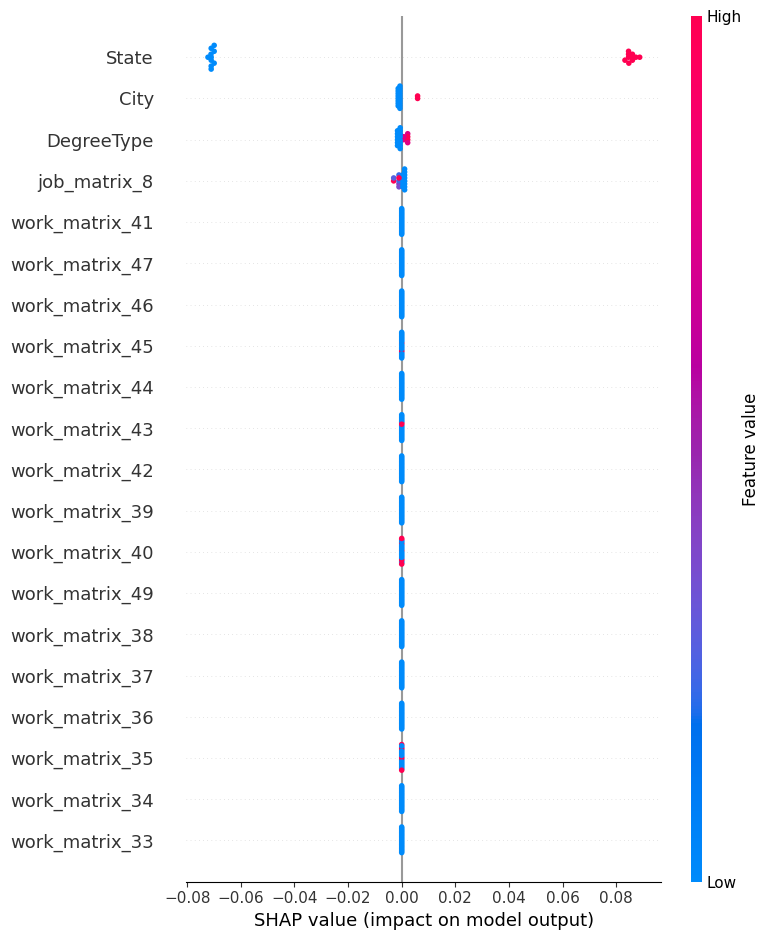

In [37]:
shap.summary_plot(shap_values_xgbt, X_test.iloc[0:20,:])

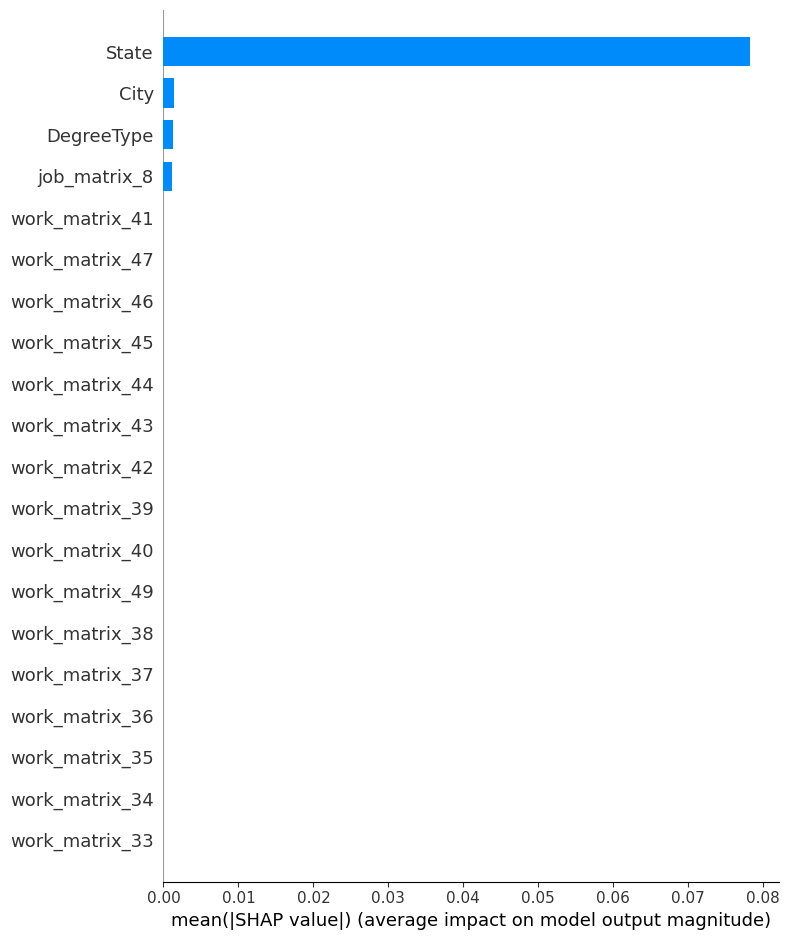

In [38]:
shap.summary_plot(shap_values_xgbt, X_test.iloc[0:20,:], plot_type="bar")

In [39]:
%%time
# Explain one case
# Generate explanation for one single case (X_test.iloc[0,:])
shap_values_single = explainer.shap_values(X_test.iloc[0,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, X_test.iloc[0,:])

CPU times: user 1min 16s, sys: 1.89 s, total: 1min 18s
Wall time: 1min 8s


In [40]:
# Save shap_values 
shap_values_xgbt_df = get_shap_df(shap_values_xgbt)
shap_values_xgbt_df.head()

,City,State,Country,DegreeType,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,work_matrix_0,...,job_matrix_92,job_matrix_93,job_matrix_94,job_matrix_95,job_matrix_96,job_matrix_97,job_matrix_98,job_matrix_99,UserID,JobID
0,-0.001307,0.083262,0.0,0.000775,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,821691
1,-0.000652,-0.069934,0.0,0.002235,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,329572
2,-0.000652,-0.069934,0.0,0.002235,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,514,131166
3,-0.000652,-0.069934,0.0,0.002235,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,514,620304
4,-0.001307,0.084602,0.0,-0.000565,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,681,654542


In [41]:
shap_values_xgbt_df.to_csv(f'./output_shap/shap_sample20_{model}_flat.csv', header=True, index=False)

## 3. Model: Naive Bayes

In [42]:
# Load a baseline model
import pickle
model = 'nb'
model_name = './output_baseline_tabular/cb12_nb_flat.pikle'
nb = pickle.load(open(model_name, "rb"))

In [43]:
%%time

# Create explainer
f = lambda x: nb.predict_proba(x)[:,1]
explainer = shap.KernelExplainer(f, X_test)

Using 15736 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


CPU times: user 34.6 ms, sys: 165 ms, total: 199 ms
Wall time: 214 ms


In [44]:
%%time
shap_values_nb = explainer.shap_values(X_test.iloc[0:20,:], nsamples=500)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 40min 44s, sys: 38min 9s, total: 1h 18min 54s
Wall time: 2h 6min 54s


In [45]:
shap.force_plot(explainer.expected_value, shap_values_nb, X_test.iloc[0:20,:])

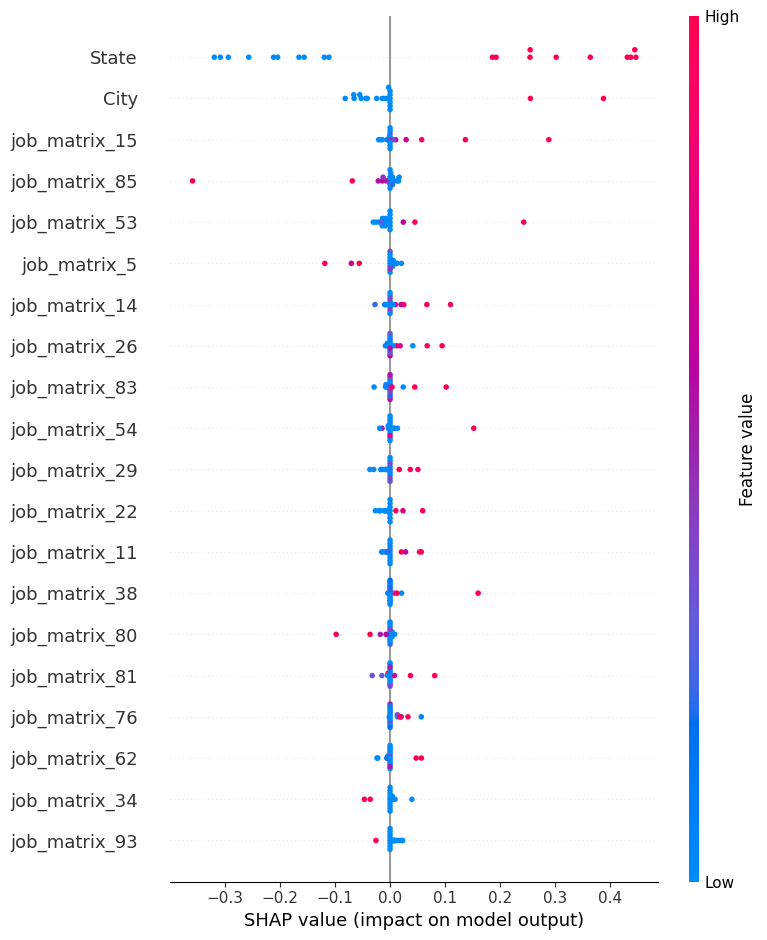

In [46]:
shap.summary_plot(shap_values_nb, X_test.iloc[0:20,:])

In [47]:
%%time
# Explain one case
# Generate explanation for one single case (X_test.iloc[0,:])
shap_values_single = explainer.shap_values(X_test.iloc[0,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, X_test.iloc[0,:])

CPU times: user 1min 10s, sys: 3.11 s, total: 1min 13s
Wall time: 1min 13s


In [48]:
# Save shap_values 
shap_values_nb_df = get_shap_df(shap_values_nb)
shap_values_nb_df.head()

,City,State,Country,DegreeType,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,work_matrix_0,...,job_matrix_92,job_matrix_93,job_matrix_94,job_matrix_95,job_matrix_96,job_matrix_97,job_matrix_98,job_matrix_99,UserID,JobID
0,0.000000,0.254174,0.013855,0.000000,0.000000,0.00000,0.001662,-0.000371,0.000000,0.000000,...,0.012392,0.008060,0.009756,0.000000,-0.003648,0.000000,-0.016281,0.000000,13,821691
1,-0.006569,-0.119442,0.001973,0.000000,0.000000,0.00000,-0.011309,-0.015771,0.000000,0.017439,...,0.015291,0.018224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13,329572
2,0.000000,-0.156005,0.000000,0.000000,0.000000,0.00000,0.000000,0.005958,0.000000,0.000000,...,0.015015,0.022896,0.000000,0.008945,0.000000,0.000000,0.000000,0.000000,514,131166
3,-0.081445,-0.165427,-0.009364,0.007275,-0.008535,-0.01503,0.000000,0.005781,-0.005637,0.008342,...,0.012769,-0.025615,0.000000,0.000000,-0.014334,0.000000,-0.005033,0.011569,514,620304
4,-0.010763,0.437159,0.003033,0.000000,0.000000,0.00000,0.000000,0.000000,0.006896,-0.006169,...,0.006608,0.006148,0.000000,-0.004424,0.001842,-0.003588,0.000000,0.001960,681,654542


In [49]:
shap_values_nb_df.to_csv(f'./output_shap/shap_sample20_{model}_flat.csv', header=True, index=False)

## 4. Model: LDA

In [50]:
# Load a baseline model
import pickle
model = 'lda'
model_name = './output_baseline_tabular/cb12_lda_flat.pikle'
lda = pickle.load(open(model_name, "rb"))

In [51]:
%%time

# Create explainer
f = lambda x: lda.predict_proba(x)[:,1]
explainer = shap.KernelExplainer(f, X_test)

Using 15736 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


CPU times: user 164 ms, sys: 229 ms, total: 393 ms
Wall time: 154 ms


In [52]:
%%time
shap_values_lda = explainer.shap_values(X_test.iloc[0:20,:], nsamples=500)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 31min 51s, sys: 3min 24s, total: 35min 15s
Wall time: 34min 33s


In [53]:
shap.force_plot(explainer.expected_value, shap_values_lda, X_test.iloc[0:20,:])

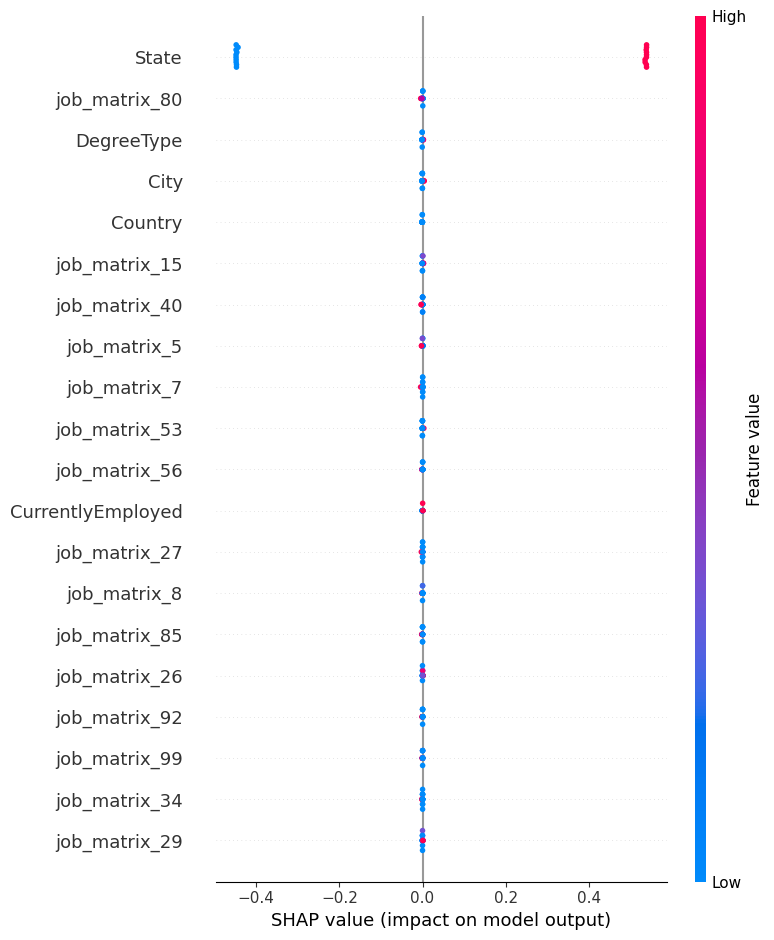

In [54]:
shap.summary_plot(shap_values_lda, X_test.iloc[0:20,:])

In [55]:
%%time
# Explain one case
# Generate explanation for one single case (X_test.iloc[0,:])
shap_values_single = explainer.shap_values(X_test.iloc[0,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, X_test.iloc[0,:])

CPU times: user 1min 6s, sys: 1.56 s, total: 1min 7s
Wall time: 1min 7s


In [56]:
# Save shap_values 
shap_values_lda_df = get_shap_df(shap_values_lda)
shap_values_lda_df.head()

,City,State,Country,DegreeType,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,work_matrix_0,...,job_matrix_92,job_matrix_93,job_matrix_94,job_matrix_95,job_matrix_96,job_matrix_97,job_matrix_98,job_matrix_99,UserID,JobID
0,-0.000318,0.535280,-0.000598,0.000621,0.000000,0.000000,0.000176,0.000000,0.000000,0.000239,...,0.000000,0.000050,0.000000,0.000086,0.000000,0.000000,0.000000,0.000043,13,821691
1,-0.001941,-0.443720,-0.001226,0.001558,-0.000003,-0.000184,0.000781,0.000000,0.000000,0.000000,...,0.000750,0.000511,0.000000,0.000064,0.000000,0.000000,0.000000,0.000899,13,329572
2,-0.001217,-0.446560,-0.001230,0.002301,0.000000,-0.000125,-0.000811,0.000000,-0.000036,0.000000,...,0.000293,0.000259,0.000179,0.000149,0.000235,0.000000,0.000173,-0.000797,514,131166
3,-0.000506,-0.448561,-0.000534,0.001184,-0.000029,-0.000140,-0.000267,-0.000069,-0.000016,0.000049,...,0.000129,-0.001314,0.000097,0.000129,0.000000,-0.000037,0.000000,0.000044,514,620304
4,-0.000247,0.538858,-0.000463,-0.000763,-0.000237,-0.000099,-0.000279,0.000000,0.000000,0.000033,...,0.000219,0.000148,-0.000261,-0.000140,0.000136,-0.000073,0.000000,0.000205,681,654542


In [57]:
shap_values_lda_df.to_csv(f'./output_shap/shap_sample20_{model}_flat.csv', header=True, index=False)

## 5. Model: Decision Tree (DT)

In [21]:
# Load a baseline model
import pickle
model = 'dt'
model_name = './output_baseline_tabular/cb12_dt_flat.pikle'
dt = pickle.load(open(model_name, "rb"))

In [22]:
%%time

# Create explainer
f = lambda x: dt.predict_proba(x)[:,1]
explainer = shap.KernelExplainer(f, X_test)

Using 15736 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


CPU times: user 16.8 ms, sys: 8.11 ms, total: 25 ms
Wall time: 22.5 ms


In [23]:
%%time
shap_values_dt = explainer.shap_values(X_test.iloc[0:20,:], nsamples=500)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 38min 21s, sys: 7min 46s, total: 46min 7s
Wall time: 37min 46s


In [24]:
shap.force_plot(explainer.expected_value, shap_values_dt, X_test.iloc[0:20,:])

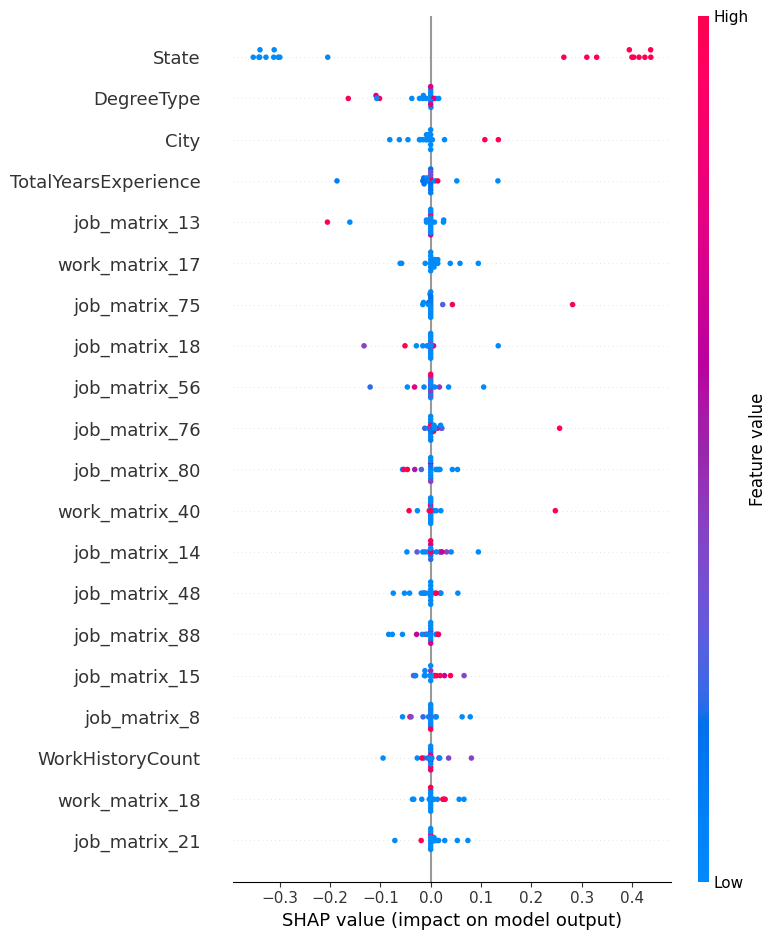

In [25]:
shap.summary_plot(shap_values_dt, X_test.iloc[0:20,:])

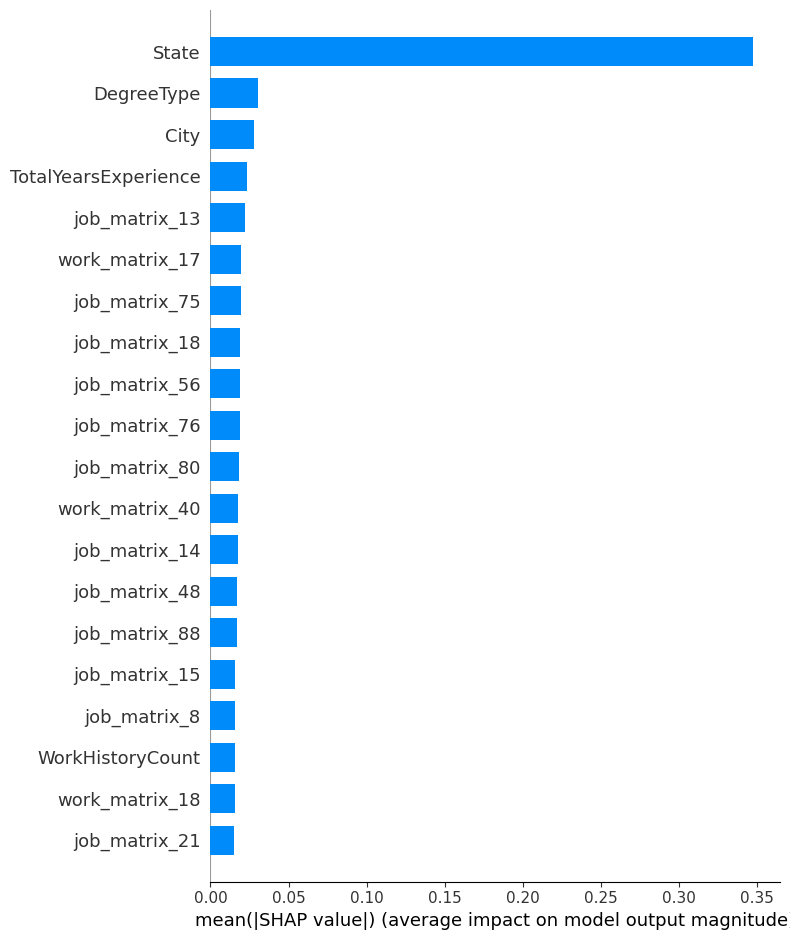

In [26]:
shap.summary_plot(shap_values_dt, X_test.iloc[0:20,:], plot_type = 'bar')

In [27]:
# Explain one case
# Generate explanation for one single case (X_test.iloc[0,:])
shap_values_single = explainer.shap_values(X_test.iloc[0,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, X_test.iloc[0,:])

In [28]:
# Save shap_values 
shap_values_dt_df = get_shap_df(shap_values_dt)
shap_values_dt_df.head()

,City,State,Country,DegreeType,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,work_matrix_0,...,job_matrix_92,job_matrix_93,job_matrix_94,job_matrix_95,job_matrix_96,job_matrix_97,job_matrix_98,job_matrix_99,UserID,JobID
0,-0.022347,0.399682,0.037441,0.005659,0.000000,-0.006631,-0.014812,-0.028868,0.000000,0.016224,...,0.017247,-0.022788,-0.007503,0.002351,0.000000,0.000000,-0.012628,-0.014277,13,821691
1,-0.015565,-0.327248,0.000000,-0.108623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014928,0.000000,0.000000,13,329572
2,-0.009867,-0.310877,-0.005540,-0.163695,0.080863,-0.186110,0.016894,-0.003455,-0.004390,0.035061,...,-0.017473,0.000000,0.041955,0.077038,0.012459,-0.013438,0.058685,-0.019355,514,131166
3,0.027465,-0.339727,-0.023302,-0.101652,0.035597,0.000000,0.000000,0.000000,0.025663,0.000000,...,0.000000,0.057514,0.004747,0.000000,-0.018280,-0.029688,0.000000,0.026307,514,620304
4,0.003315,0.437198,0.000000,-0.008862,0.000000,-0.014888,-0.004675,0.000000,0.000000,0.009315,...,0.000000,0.022613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,681,654542


In [29]:
shap_values_dt_df.to_csv(f'./output_shap/shap_sample20_{model}_flat.csv', header=True, index=False)

## 6. Model: Adaboost - DONE

In [30]:
# Load a baseline model
import pickle
model = 'ada'
model_name = './output_baseline_tabular/cb12_ada_flat.pikle'
ada = pickle.load(open(model_name, "rb"))

In [31]:
%%time

# Create explainer
f = lambda x: ada.predict_proba(x)[:,1]
explainer = shap.KernelExplainer(f, X_test)

Using 15736 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


CPU times: user 375 ms, sys: 8.05 ms, total: 383 ms
Wall time: 380 ms


In [32]:
%%time
shap_values_ada = explainer.shap_values(X_test.iloc[0:20,:], nsamples=500)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 1h 48min 44s, sys: 40min 14s, total: 2h 28min 59s
Wall time: 2h 21min 33s


In [33]:
shap.force_plot(explainer.expected_value, shap_values_ada, X_test.iloc[0:20,:])

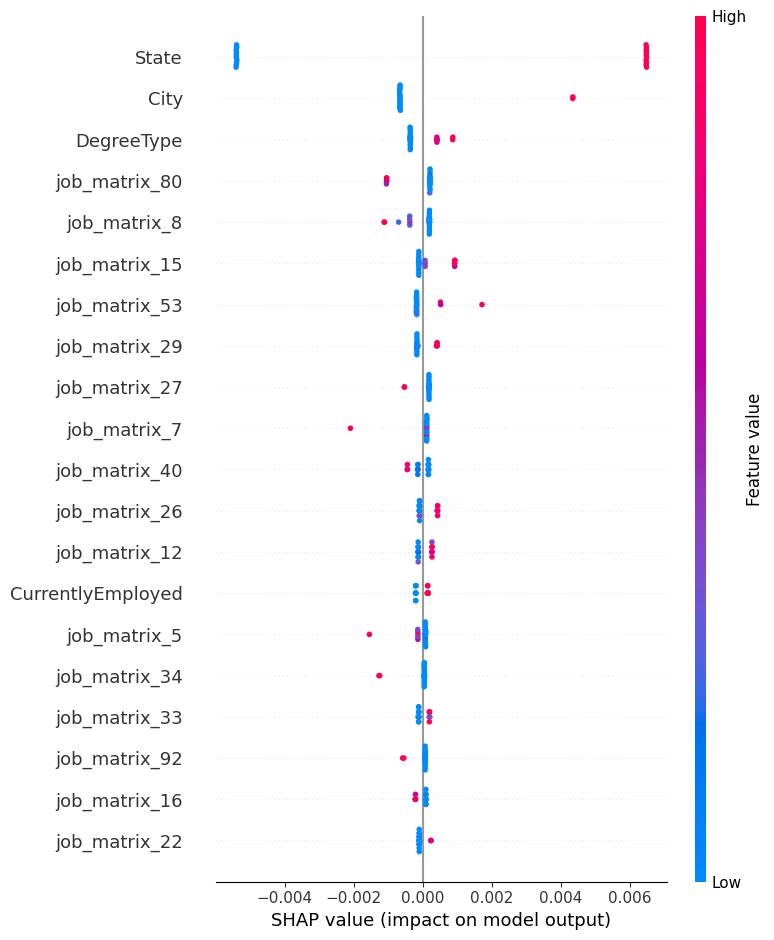

In [34]:
shap.summary_plot(shap_values_ada, X_test.iloc[0:20,:])

In [35]:
# Explain one case
# Generate explanation for one single case (X_test.iloc[0,:])
shap_values_single = explainer.shap_values(X_test.iloc[0,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, X_test.iloc[0,:])

In [36]:
# Save shap_values 
shap_values_ada_df = get_shap_df(shap_values_ada)
shap_values_ada_df.head()

,City,State,Country,DegreeType,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,work_matrix_0,...,job_matrix_92,job_matrix_93,job_matrix_94,job_matrix_95,job_matrix_96,job_matrix_97,job_matrix_98,job_matrix_99,UserID,JobID
0,-0.000660,0.006473,0.000000,0.000422,-0.000040,-0.000032,0.000160,0.000000,0.000000,0.0,...,0.000071,0.000076,0.000000,0.000077,0.000099,0.0,0.0,0.000103,13,821691
1,-0.000661,-0.005395,-0.000014,0.000413,-0.000037,-0.000038,0.000156,0.000000,-0.000026,0.0,...,0.000079,0.000079,0.000000,0.000083,0.000097,0.0,0.0,0.000111,13,329572
2,-0.000652,-0.005386,0.000000,0.000870,-0.000032,-0.000041,-0.000206,0.000000,-0.000020,0.0,...,0.000068,0.000072,-0.000004,0.000083,0.000085,0.0,0.0,-0.000075,514,131166
3,-0.000664,-0.005391,-0.000013,0.000875,-0.000040,-0.000036,-0.000197,0.000000,-0.000025,0.0,...,0.000075,-0.000768,0.000000,0.000075,0.000100,0.0,0.0,-0.000082,514,620304
4,-0.000645,0.006471,0.000000,-0.000354,-0.000047,0.000000,-0.000202,-0.000008,0.000000,0.0,...,0.000067,0.000063,0.000000,-0.000143,0.000095,0.0,0.0,0.000106,681,654542


In [37]:
shap_values_ada_df.to_csv(f'./output_shap/shap_sample20_{model}_flat.csv', header=True, index=False)

## 7. Model: QDA

In [12]:
# Load a baseline model
import pickle
model = 'qda'
model_name = './output_baseline_tabular/cb12_qda_flat.pikle'
qda = pickle.load(open(model_name, "rb"))

In [13]:
%%time

# Create explainer
f = lambda x: qda.predict_proba(x)[:,1]
explainer = shap.KernelExplainer(f, X_test)

Using 15736 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


CPU times: user 1.3 s, sys: 3.36 s, total: 4.66 s
Wall time: 182 ms


In [14]:
%%time
shap_values_qda = explainer.shap_values(X_test.iloc[0:20,:], nsamples=500)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 3h 32min 41s, sys: 36min 38s, total: 4h 9min 20s
Wall time: 34min 25s


In [19]:
shap.initjs()

In [20]:
shap.force_plot(explainer.expected_value, shap_values_qda, X_test.iloc[0:20,:])

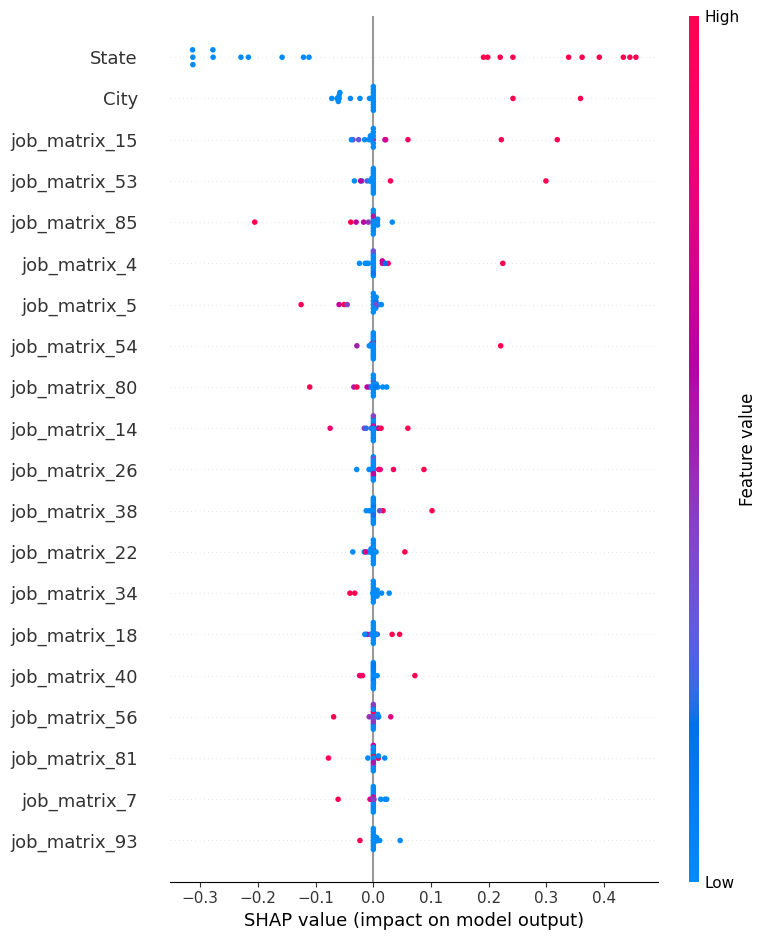

In [16]:
shap.summary_plot(shap_values_qda, X_test.iloc[0:20,:])

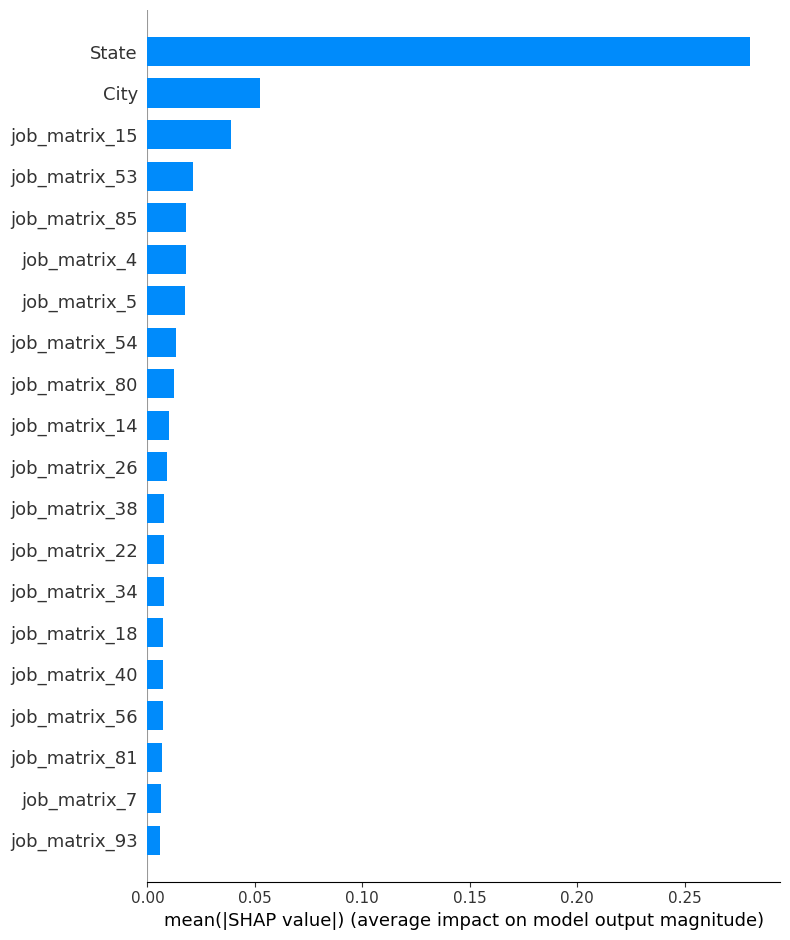

In [21]:
shap.summary_plot(shap_values_qda, X_test.iloc[0:20,:], plot_type = 'bar')

In [22]:
%%time
# Explain one case
# Generate explanation for one single case (X_test.iloc[0,:])
shap_values_single = explainer.shap_values(X_test.iloc[0,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, X_test.iloc[0,:])

CPU times: user 2min 49s, sys: 34.7 s, total: 3min 24s
Wall time: 1min 1s


In [25]:
# Save shap_values 
shap_values_qda_df = get_shap_df(shap_values_qda)
shap_values_qda_df.head()

,City,State,Country,DegreeType,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,work_matrix_0,...,job_matrix_92,job_matrix_93,job_matrix_94,job_matrix_95,job_matrix_96,job_matrix_97,job_matrix_98,job_matrix_99,UserID,JobID
0,0.000000,0.241891,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.004594,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,13,821691
1,0.000000,-0.121038,0.030426,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.006422,...,0.012788,0.011061,0.0,0.000000,0.015010,0.000000,0.008527,0.009941,13,329572
2,0.000000,-0.158102,0.000000,0.016264,0.0,0.010787,0.0,0.000000,0.001313,-0.000849,...,0.025063,0.003151,0.0,0.014062,0.006793,0.000000,0.000000,0.000000,514,131166
3,-0.072073,-0.216611,-0.009333,0.000000,0.0,0.000000,0.0,0.019217,0.000000,-0.005681,...,0.000000,-0.023268,0.0,0.000000,-0.004844,-0.016412,-0.018192,-0.004115,514,620304
4,0.000000,0.433357,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000114,0.004810,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,681,654542


In [26]:
shap_values_qda_df.to_csv(f'./output_shap/shap_sample20_{model}_flat.csv', header=True, index=False)